In [4]:
import pandas as pd
import numpy as np
import warnings

In [5]:
 assignment = pd.read_csv("hotels-europe_features.csv", encoding="utf-8")# reading csv file

In [6]:
assignment.describe().transpose() #depicting statistical table

,count,mean,std,min,25%,50%,75%,max
hotel_id,22902.0,11451.500000,6611.382268,1.0,5726.25,11451.5,17176.75,22902.0
distance,22902.0,2.784071,4.788725,0.0,0.70,1.3,2.60,57.0
stars,17187.0,3.297347,0.844395,1.0,3.00,3.0,4.00,5.0
rating,20722.0,3.902847,0.637501,1.0,3.50,4.0,4.40,5.0
rating_reviewcount,20722.0,136.864347,225.893060,1.0,18.00,63.0,161.00,4300.0
ratingta,19909.0,3.944874,0.663428,1.0,3.50,4.0,4.50,5.0
ratingta_count,19909.0,435.459440,680.099877,0.0,53.00,184.0,530.00,17139.0
distance_alter,22902.0,4.519841,6.162886,0.0,1.10,2.7,6.00,65.0


In [7]:
assignment.filter(["stars", "rating", "distance"]).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stars,17187.0,3.297347,0.844395,1.0,3.0,3.0,4.0,5.0
rating,20722.0,3.902847,0.637501,1.0,3.5,4.0,4.4,5.0
distance,22902.0,2.784071,4.788725,0.0,0.7,1.3,2.6,57.0


In [8]:
assignment.shape
# checking how many observations and variables before deleting missing values

(22902, 15)

In [9]:
assignment.loc[assignment["accommodation_type"] == "Hotel"] # choosing hotels from accomo=modation type

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,neighbourhood,ratingta,ratingta_count,distance_alter,accommodation_type
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,Amsterdam,4.0,1115.0,3.6,Hotel
2,3,Amsterdam,1.5,4.0,4.1,Netherlands,Amsterdam,165.0,City centre,Montelbaanstoren,Amsterdam,4.0,674.0,1.4,Hotel
3,4,Amsterdam,1.9,3.0,3.5,Netherlands,Amsterdam,298.0,City centre,Montelbaanstoren,Amsterdam,3.5,1882.0,2.1,Hotel
4,5,Amsterdam,1.8,3.5,4.0,Netherlands,Amsterdam,4.0,City centre,Montelbaanstoren,Amsterdam,4.5,66.0,2.0,Hotel
5,6,Amsterdam,1.9,4.0,4.1,Netherlands,Amsterdam,310.0,City centre,Montelbaanstoren,Amsterdam,4.0,767.0,2.0,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22893,22894,Zagreb,1.3,4.0,4.5,Croatia,Zagreb,215.0,City centre,Zagreb City Museum,Zagreb,4.5,1167.0,1.7,Hotel
22895,22896,Zagreb,0.3,3.0,4.0,Croatia,Zagreb,145.0,City centre,Zagreb City Museum,Zagreb,3.5,288.0,0.6,Hotel
22899,22900,Zagreb,3.9,4.0,4.4,Croatia,Zagreb,9.0,City centre,Zagreb City Museum,Zagreb,4.5,225.0,3.9,Hotel
22900,22901,Zagreb,3.3,3.0,3.5,Croatia,Zagreb,24.0,City centre,Zagreb City Museum,Zagreb,3.0,14.0,3.3,Hotel


In [10]:
assignment["rating"].isnull().sum() # getting how many missing values 

2180

In [11]:
assignment.loc[assignment["rating"].isnull()] # showing them in rating category

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,neighbourhood,ratingta,ratingta_count,distance_alter,accommodation_type
67,68,Amsterdam,2.4,4.0,NaN,Netherlands,Amsterdam,NaN,City centre,Montelbaanstoren,Amsterdam West,3.5,3.0,3.0,Hotel
91,92,Amsterdam,4.7,3.5,NaN,Netherlands,Amsterdam,NaN,City centre,Montelbaanstoren,Amsterdam West,NaN,NaN,5.1,Apartment
212,213,Amsterdam,0.7,4.0,NaN,Netherlands,Amsterdam,NaN,City centre,Montelbaanstoren,Dam Square - Central Station,NaN,NaN,0.2,Hotel
262,263,Amsterdam,0.7,3.0,NaN,Netherlands,Amsterdam,NaN,City centre,Montelbaanstoren,Jordaan,4.5,64.0,1.2,Bed and breakfast
333,334,Amsterdam,1.4,3.5,NaN,Netherlands,Amsterdam,NaN,City centre,Montelbaanstoren,Museum Quarter,5.0,21.0,1.7,Bed and breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,22836,Warsaw,2.4,4.0,NaN,Poland,Warsaw,NaN,City centre,Nowy Swiat Street,Warsaw,NaN,NaN,2.7,Apart-hotel
22837,22838,Warsaw,1.3,3.5,NaN,Poland,Warsaw,NaN,City centre,Nowy Swiat Street,Warsaw,NaN,NaN,1.8,Apartment
22842,22843,Zagreb,0.3,1.0,NaN,Croatia,Zagreb,NaN,City centre,Zagreb City Museum,Zagreb,NaN,NaN,0.8,Hostel
22877,22878,Zagreb,2.9,4.0,NaN,Croatia,Zagreb,NaN,City centre,Zagreb City Museum,Zagreb,5.0,8.0,3.3,Bed and breakfast


In [12]:
assignment = assignment.loc[assignment["rating"].notnull()] # removing missing values from rating column

In [13]:
assignment["rating"].isnull().sum()

0

In [14]:
assignment.shape

(20722, 15)

In [15]:
assignment.duplicated().sum()
#checking for duplicates

0

In [16]:
assignment.drop(
    columns=[
        "ratingta",
        "ratingta_count",
        "distance_alter",
    ],
    inplace=True,
)
# dropping some unneccarry variables

In [17]:
assignment.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hotel_id,20722.0,11309.959898,6609.212667,1.0,5540.25,11440.5,17006.75,22902.0
distance,20722.0,2.761731,4.723250,0.0,0.70,1.3,2.60,57.0
stars,16040.0,3.304676,0.855497,1.0,3.00,3.0,4.00,5.0
rating,20722.0,3.902847,0.637501,1.0,3.50,4.0,4.40,5.0
rating_reviewcount,20722.0,136.864347,225.893060,1.0,18.00,63.0,161.00,4300.0


In [18]:
new = assignment.columns.tolist()
print(new)

['hotel_id', 'city', 'distance', 'stars', 'rating', 'country', 'city_actual', 'rating_reviewcount', 'center1label', 'center2label', 'neighbourhood', 'accommodation_type']


In [19]:
for hotel_id, stars in zip(assignment['hotel_id'], assignment['stars']):
    if stars >= 3:
        print(f"{hotel_id} is good")
    else:
        print(f"{hotel_id} is bad")
# creating automative repeating hotels with its stars

1 is good
2 is bad
3 is good
4 is good
5 is good
6 is good
7 is good
8 is good
9 is good
10 is good
11 is good
12 is bad
13 is good
14 is good
15 is good
16 is good
17 is good
18 is good
19 is good
20 is good
21 is good
22 is good
23 is good
24 is good
25 is bad
26 is good
27 is good
28 is good
29 is good
30 is good
31 is good
32 is good
33 is good
34 is good
35 is bad
36 is bad
37 is good
38 is good
39 is bad
40 is good
41 is good
42 is good
43 is good
44 is good
45 is good
46 is good
47 is good
48 is good
49 is bad
50 is good
51 is good
52 is bad
53 is bad
54 is good
55 is bad
56 is good
57 is good
58 is good
59 is good
60 is good
61 is good
62 is good
63 is good
64 is bad
65 is good
66 is good
67 is good
69 is good
70 is good
71 is good
72 is good
73 is good
74 is bad
75 is good
76 is good
77 is good
78 is good
79 is bad
80 is good
81 is good
82 is good
83 is good
84 is good
85 is good
86 is good
87 is good
88 is good
89 is good
90 is good
91 is good
93 is good
94 is bad
95 is good


891 is good
892 is good
893 is good
894 is bad
895 is good
896 is good
897 is good
898 is good
899 is good
900 is bad
901 is bad
902 is good
903 is bad
904 is good
905 is good
906 is good
907 is good
908 is bad
909 is good
910 is good
911 is bad
912 is bad
913 is bad
914 is good
915 is bad
916 is good
917 is bad
918 is bad
919 is bad
920 is good
921 is good
922 is good
923 is bad
924 is good
925 is good
926 is bad
927 is good
928 is bad
929 is good
930 is bad
931 is bad
932 is bad
933 is bad
934 is bad
935 is good
936 is bad
937 is good
938 is good
939 is bad
940 is good
941 is good
942 is bad
943 is good
944 is good
945 is good
946 is good
947 is good
948 is good
949 is bad
950 is good
951 is good
952 is good
953 is good
954 is good
955 is bad
956 is good
958 is good
959 is good
960 is good
961 is good
962 is good
963 is good
965 is bad
966 is good
967 is good
968 is bad
969 is bad
970 is good
971 is good
972 is good
973 is good
974 is bad
975 is good
976 is good
977 is bad
978 is bad

1949 is good
1950 is good
1951 is good
1952 is good
1953 is good
1954 is bad
1955 is good
1956 is good
1957 is good
1958 is bad
1959 is good
1960 is good
1961 is good
1962 is good
1963 is bad
1964 is bad
1965 is good
1966 is bad
1967 is good
1968 is bad
1969 is good
1970 is good
1971 is good
1972 is good
1973 is good
1974 is good
1975 is good
1976 is bad
1977 is good
1978 is good
1979 is good
1980 is bad
1981 is good
1982 is bad
1983 is good
1984 is good
1985 is good
1986 is good
1987 is good
1988 is good
1989 is bad
1990 is good
1991 is bad
1992 is good
1993 is bad
1994 is good
1995 is good
1996 is good
1997 is good
1998 is bad
1999 is bad
2000 is bad
2001 is bad
2002 is good
2003 is good
2004 is good
2005 is good
2006 is good
2007 is good
2008 is good
2009 is bad
2010 is good
2011 is good
2012 is good
2013 is good
2014 is good
2015 is good
2016 is good
2017 is good
2018 is bad
2019 is good
2020 is good
2021 is good
2022 is good
2023 is good
2024 is good
2025 is bad
2026 is good
2027 

3527 is good
3528 is good
3529 is good
3530 is good
3531 is good
3532 is good
3533 is good
3534 is bad
3535 is good
3536 is good
3537 is good
3538 is good
3539 is good
3540 is good
3541 is good
3542 is good
3543 is good
3544 is good
3545 is good
3546 is good
3547 is good
3548 is good
3549 is good
3550 is good
3551 is good
3552 is good
3553 is good
3554 is good
3555 is good
3556 is good
3557 is good
3558 is good
3559 is good
3560 is good
3561 is good
3563 is bad
3564 is good
3565 is good
3566 is good
3567 is good
3568 is good
3569 is good
3571 is good
3572 is bad
3573 is good
3574 is good
3575 is good
3576 is good
3577 is good
3578 is good
3579 is good
3580 is good
3581 is bad
3582 is good
3583 is good
3585 is bad
3586 is good
3587 is bad
3588 is good
3589 is good
3590 is bad
3591 is bad
3592 is good
3593 is bad
3594 is good
3595 is good
3596 is bad
3597 is good
3598 is bad
3599 is good
3600 is good
3601 is bad
3602 is good
3603 is good
3604 is good
3605 is good
3606 is good
3607 is bad

5192 is bad
5193 is good
5194 is good
5195 is bad
5196 is bad
5197 is good
5198 is bad
5199 is bad
5200 is bad
5201 is good
5202 is bad
5203 is bad
5204 is bad
5205 is good
5206 is good
5207 is good
5208 is good
5209 is good
5210 is good
5211 is good
5212 is bad
5213 is good
5214 is good
5215 is bad
5216 is good
5217 is good
5218 is bad
5219 is bad
5220 is bad
5221 is bad
5222 is bad
5223 is bad
5224 is bad
5225 is bad
5226 is bad
5227 is bad
5228 is good
5229 is bad
5230 is bad
5231 is bad
5232 is good
5233 is bad
5234 is bad
5235 is bad
5236 is bad
5237 is good
5238 is bad
5239 is bad
5240 is bad
5241 is bad
5242 is good
5243 is bad
5244 is bad
5245 is good
5246 is bad
5247 is good
5248 is bad
5249 is good
5250 is bad
5251 is bad
5252 is bad
5253 is good
5254 is bad
5255 is good
5256 is bad
5257 is bad
5258 is good
5260 is good
5261 is good
5262 is bad
5263 is bad
5264 is good
5265 is bad
5266 is bad
5267 is good
5268 is bad
5269 is bad
5270 is good
5271 is bad
5272 is bad
5273 is ba

6837 is good
6838 is good
6839 is good
6840 is bad
6841 is bad
6842 is good
6843 is bad
6845 is bad
6846 is good
6847 is bad
6848 is good
6849 is good
6850 is good
6851 is good
6853 is good
6854 is bad
6855 is bad
6856 is good
6857 is good
6859 is good
6860 is good
6861 is bad
6863 is bad
6864 is bad
6865 is bad
6866 is good
6867 is bad
6868 is good
6869 is good
6870 is good
6871 is bad
6872 is bad
6873 is good
6874 is bad
6875 is bad
6876 is good
6877 is bad
6878 is bad
6879 is good
6880 is good
6882 is bad
6883 is bad
6884 is good
6885 is good
6886 is bad
6887 is bad
6888 is good
6889 is bad
6891 is good
6893 is good
6894 is bad
6895 is good
6896 is good
6897 is good
6898 is bad
6899 is bad
6900 is bad
6901 is good
6902 is good
6904 is bad
6908 is bad
6909 is good
6910 is good
6911 is bad
6912 is good
6913 is bad
6914 is good
6916 is good
6917 is bad
6918 is good
6919 is good
6920 is good
6921 is good
6923 is bad
6924 is good
6927 is good
6928 is good
6930 is good
6931 is good
6932 i

8212 is good
8213 is good
8214 is good
8215 is good
8216 is good
8217 is good
8218 is bad
8219 is good
8220 is good
8221 is good
8222 is good
8223 is good
8224 is bad
8226 is bad
8227 is bad
8228 is good
8229 is good
8230 is bad
8231 is good
8232 is good
8233 is good
8234 is good
8235 is bad
8236 is good
8237 is good
8238 is good
8239 is good
8240 is good
8241 is good
8242 is bad
8243 is good
8244 is bad
8245 is bad
8246 is bad
8247 is good
8249 is good
8250 is good
8251 is good
8252 is good
8255 is good
8256 is good
8258 is bad
8260 is good
8261 is good
8262 is good
8264 is good
8266 is good
8267 is good
8268 is good
8269 is good
8270 is good
8271 is good
8272 is good
8273 is good
8274 is good
8275 is good
8276 is good
8277 is good
8278 is good
8279 is bad
8280 is good
8281 is good
8282 is good
8284 is good
8285 is good
8286 is good
8287 is good
8288 is good
8289 is good
8290 is good
8291 is good
8292 is good
8294 is good
8295 is good
8296 is good
8297 is good
8298 is good
8300 is bad

9583 is good
9584 is bad
9585 is good
9586 is good
9587 is bad
9588 is bad
9589 is good
9590 is good
9591 is good
9592 is bad
9593 is good
9594 is bad
9595 is bad
9596 is good
9598 is good
9599 is bad
9600 is bad
9601 is bad
9602 is good
9603 is good
9604 is bad
9605 is good
9607 is good
9608 is bad
9609 is bad
9610 is bad
9611 is good
9612 is bad
9613 is good
9614 is bad
9615 is good
9616 is bad
9617 is good
9618 is bad
9620 is bad
9621 is good
9622 is bad
9623 is good
9624 is good
9625 is bad
9626 is good
9627 is bad
9628 is good
9629 is bad
9630 is good
9631 is bad
9632 is bad
9633 is good
9634 is bad
9635 is good
9636 is good
9637 is bad
9638 is good
9639 is good
9640 is good
9641 is bad
9642 is good
9644 is good
9645 is good
9646 is good
9647 is bad
9649 is good
9650 is good
9651 is bad
9652 is bad
9653 is bad
9654 is good
9655 is good
9656 is bad
9657 is good
9658 is good
9659 is good
9660 is good
9661 is good
9662 is bad
9663 is bad
9664 is bad
9665 is bad
9666 is bad
9667 is go

11048 is good
11049 is good
11050 is good
11051 is good
11052 is bad
11054 is good
11056 is good
11057 is good
11058 is bad
11060 is good
11061 is good
11064 is good
11065 is good
11066 is good
11069 is good
11070 is good
11071 is good
11072 is good
11073 is good
11074 is good
11077 is bad
11079 is good
11080 is good
11081 is good
11082 is good
11083 is good
11084 is good
11086 is bad
11088 is good
11089 is bad
11090 is bad
11092 is good
11093 is good
11094 is good
11095 is good
11096 is good
11097 is good
11098 is good
11103 is good
11104 is good
11105 is bad
11106 is good
11107 is good
11108 is good
11109 is good
11110 is good
11111 is bad
11112 is good
11113 is good
11114 is good
11115 is good
11117 is bad
11118 is good
11119 is good
11120 is good
11122 is good
11123 is bad
11124 is good
11125 is good
11126 is bad
11127 is good
11128 is good
11129 is good
11130 is good
11131 is bad
11132 is good
11133 is good
11136 is good
11140 is good
11141 is bad
11142 is bad
11143 is good
11144 

12513 is good
12514 is bad
12515 is bad
12516 is good
12517 is bad
12518 is good
12519 is good
12520 is bad
12521 is good
12522 is good
12523 is good
12524 is bad
12525 is bad
12526 is good
12527 is bad
12528 is good
12529 is good
12530 is good
12531 is good
12532 is good
12533 is good
12534 is good
12535 is bad
12536 is good
12537 is good
12538 is good
12539 is good
12540 is bad
12541 is good
12542 is bad
12543 is bad
12544 is bad
12545 is good
12546 is good
12547 is good
12548 is bad
12549 is bad
12550 is good
12551 is good
12552 is bad
12553 is good
12554 is bad
12555 is bad
12556 is bad
12557 is good
12558 is good
12559 is good
12560 is bad
12561 is good
12562 is bad
12563 is bad
12564 is good
12565 is bad
12566 is good
12567 is good
12568 is bad
12569 is bad
12570 is good
12571 is bad
12572 is good
12573 is good
12574 is good
12575 is good
12576 is bad
12577 is good
12578 is good
12579 is bad
12580 is bad
12581 is good
12582 is good
12583 is good
12584 is good
12585 is good
12586 

14012 is good
14013 is good
14015 is bad
14016 is bad
14017 is good
14018 is bad
14019 is good
14020 is good
14021 is good
14022 is good
14023 is good
14024 is good
14025 is bad
14026 is good
14027 is bad
14028 is good
14029 is bad
14030 is bad
14031 is bad
14032 is bad
14033 is bad
14034 is good
14035 is bad
14036 is bad
14037 is good
14038 is good
14039 is good
14040 is bad
14041 is good
14042 is good
14043 is good
14044 is good
14045 is good
14046 is good
14047 is good
14048 is bad
14049 is bad
14050 is bad
14051 is good
14052 is good
14053 is bad
14054 is good
14055 is good
14056 is bad
14057 is good
14058 is good
14059 is bad
14060 is good
14061 is good
14062 is good
14063 is good
14064 is bad
14065 is bad
14066 is good
14067 is good
14068 is bad
14069 is good
14070 is bad
14071 is good
14072 is good
14073 is good
14074 is good
14075 is bad
14076 is good
14077 is bad
14078 is bad
14079 is good
14081 is bad
14082 is good
14083 is good
14084 is good
14085 is good
14086 is bad
14087 

15086 is good
15087 is good
15089 is good
15090 is good
15091 is good
15092 is good
15093 is good
15094 is good
15095 is good
15096 is good
15097 is good
15098 is good
15099 is good
15100 is good
15101 is good
15102 is good
15104 is good
15105 is good
15107 is good
15108 is good
15109 is good
15110 is good
15111 is good
15112 is good
15113 is good
15114 is good
15115 is good
15116 is good
15117 is good
15118 is good
15119 is good
15120 is good
15121 is good
15122 is good
15123 is good
15124 is good
15125 is good
15126 is good
15127 is good
15128 is bad
15129 is good
15130 is good
15132 is good
15133 is good
15134 is good
15135 is bad
15136 is good
15137 is good
15138 is good
15139 is good
15140 is good
15141 is good
15142 is good
15143 is good
15144 is good
15145 is good
15146 is bad
15147 is good
15148 is good
15149 is good
15151 is good
15152 is good
15153 is good
15154 is good
15155 is good
15156 is good
15157 is good
15158 is good
15159 is good
15160 is bad
15161 is good
15162 is g

16534 is bad
16535 is bad
16536 is bad
16537 is bad
16538 is bad
16540 is bad
16539 is bad
16542 is good
16541 is good
16544 is bad
16543 is bad
16546 is good
16545 is good
16547 is bad
16549 is bad
16548 is bad
16551 is good
16550 is good
16553 is bad
16552 is bad
16554 is bad
16555 is bad
16556 is bad
16557 is bad
16558 is bad
16559 is bad
16560 is bad
16561 is bad
16562 is bad
16563 is bad
16564 is bad
16565 is bad
16566 is good
16567 is good
16569 is good
16568 is good
16571 is good
16570 is good
16572 is bad
16574 is bad
16573 is bad
16575 is bad
16576 is good
16577 is good
16579 is good
16578 is good
16581 is bad
16580 is bad
16582 is good
16583 is good
16584 is bad
16585 is bad
16587 is good
16586 is good
16589 is bad
16588 is bad
16590 is bad
16591 is bad
16592 is bad
16594 is bad
16593 is bad
16597 is bad
16598 is bad
16599 is bad
16600 is bad
16601 is bad
16602 is bad
16604 is bad
16603 is bad
16606 is good
16605 is good
16607 is good
16608 is good
16610 is bad
16609 is bad
1

17340 is bad
17343 is bad
17342 is bad
17344 is bad
17345 is bad
17346 is bad
17347 is bad
17348 is bad
17350 is good
17349 is good
17351 is bad
17352 is bad
17354 is bad
17353 is bad
17356 is good
17355 is good
17357 is bad
17359 is good
17358 is good
17362 is good
17363 is good
17365 is bad
17364 is bad
17367 is bad
17366 is bad
17369 is bad
17368 is bad
17370 is bad
17371 is bad
17373 is bad
17372 is bad
17375 is good
17374 is good
17377 is bad
17376 is bad
17379 is bad
17378 is bad
17381 is good
17380 is good
17383 is bad
17382 is bad
17384 is bad
17386 is bad
17385 is bad
17387 is bad
17388 is bad
17390 is bad
17389 is bad
17394 is bad
17393 is bad
17396 is bad
17395 is bad
17397 is bad
17398 is bad
17400 is bad
17399 is bad
17402 is bad
17401 is bad
17404 is bad
17403 is bad
17405 is bad
17406 is bad
17407 is bad
17408 is bad
17409 is good
17410 is good
17412 is good
17411 is good
17413 is good
17414 is good
17415 is good
17417 is good
17416 is good
17419 is good
17418 is good
17

19011 is bad
19012 is bad
19013 is good
19015 is bad
19016 is bad
19017 is good
19018 is good
19020 is good
19019 is good
19021 is bad
19022 is bad
19024 is bad
19023 is bad
19026 is bad
19028 is good
19027 is good
19029 is bad
19030 is good
19031 is good
19032 is good
19033 is bad
19034 is bad
19035 is bad
19036 is bad
19037 is bad
19038 is good
19040 is good
19039 is good
19041 is bad
19042 is bad
19044 is good
19043 is good
19045 is bad
19046 is bad
19047 is bad
19048 is bad
19049 is bad
19050 is bad
19051 is bad
19052 is bad
19053 is bad
19054 is good
19055 is good
19056 is good
19057 is good
19058 is bad
19059 is bad
19061 is good
19060 is good
19063 is good
19062 is good
19065 is bad
19064 is bad
19066 is good
19068 is bad
19067 is bad
19069 is good
19070 is good
19071 is good
19072 is good
19073 is bad
19074 is bad
19075 is bad
19076 is bad
19077 is good
19078 is bad
19079 is bad
19080 is good
19081 is good
19083 is good
19082 is good
19085 is bad
19084 is bad
19086 is good
1908

19953 is bad
19956 is bad
19955 is bad
19957 is good
19960 is bad
19959 is bad
19961 is bad
19962 is bad
19964 is bad
19963 is bad
19965 is bad
19967 is bad
19966 is bad
19969 is good
19968 is good
19970 is bad
19971 is bad
19972 is bad
19973 is bad
19974 is bad
19975 is bad
19977 is bad
19976 is bad
19978 is bad
19980 is bad
19979 is bad
19982 is bad
19981 is bad
19984 is bad
19986 is bad
19985 is bad
19988 is bad
19987 is bad
19989 is bad
19990 is bad
19991 is bad
19992 is bad
19997 is bad
19998 is bad
19999 is bad
20001 is good
20000 is good
20005 is bad
20004 is bad
20006 is bad
20008 is bad
20009 is bad
20011 is bad
20010 is bad
20012 is bad
20014 is good
20013 is good
20016 is bad
20015 is bad
20017 is bad
20018 is bad
20019 is bad
20020 is bad
20021 is bad
20023 is bad
20022 is bad
20025 is bad
20024 is bad
20026 is bad
20027 is bad
20029 is good
20028 is good
20031 is bad
20030 is bad
20032 is bad
20033 is bad
20035 is good
20034 is good
20036 is bad
20037 is bad
20038 is good


21871 is good
21872 is good
21873 is good
21875 is good
21876 is bad
21877 is bad
21880 is good
21881 is bad
21882 is good
21883 is good
21884 is good
21886 is good
21887 is good
21888 is good
21889 is good
21891 is good
21892 is good
21893 is good
21894 is good
21895 is good
21896 is good
21897 is good
21900 is good
21901 is good
21902 is good
21903 is good
21904 is good
21905 is good
21906 is good
21907 is good
21908 is bad
21909 is good
21911 is good
21912 is good
21913 is good
21914 is good
21915 is bad
21917 is good
21918 is good
21919 is good
21920 is good
21922 is good
21923 is good
21924 is good
21925 is good
21926 is good
21927 is good
21928 is good
21929 is good
21930 is good
21931 is good
21932 is good
21933 is good
21934 is bad
21935 is good
21936 is bad
21937 is bad
21938 is good
21940 is good
21941 is good
21943 is good
21944 is good
21945 is bad
21946 is good
21947 is bad
21948 is bad
21949 is bad
21950 is good
21951 is bad
21952 is good
21953 is good
21954 is bad
21955 

<AxesSubplot:>

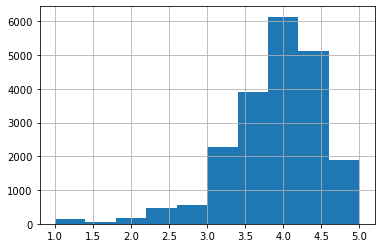

In [20]:
assignment.rating.hist() # creating histogram

In [21]:
assignment.to_csv("hotels-europe_features.csv", index=False) # saving my work